# COVID-19 und Gesundheitseinrichtungen

## Einführung

Dieses COVID-19-Problem zur Optimierung der Kapazität von Gesundheitseinrichtungen zeigt Ihnen, wie Sie den optimalen Standort und die optimale Kapazität von Gesundheitseinrichtungen bestimmen können, um:

* die Nachfrage der COVID-19-Patienten nach Behandlungen zu befriedigen,
* die Kosten für die Eröffnung temporärer Einrichtungen für Gesundheitsdienstleister zu minimieren

## Problemstellung

Die Krankenhäuser in verschiedenen Bezirken in den USA stoßen aufgrund des starken Anstiegs der COVID-19-Patienten an ihre Kapazitätsgrenzen. Viele Krankenhäuser erwägen die Einrichtung von temporären Einrichtungen, um ihre Kapazität zur Behandlung von COVID-19-Patienten zu erhöhen.

![temporäre Einrichtung](https://ik.imagekit.io/s1sp3stox/tr:h-748,w-1170,fo-auto/medicine/enterprise-and-innovation/business-support-projects/accelerate-healthcare-technology-centre/temporary-field-hospitals/field-hospitals-web.jpg)

In diesem Beispiel konzentrieren wir uns auf neun Bezirke in den USA. Jeder Bezirk verfügt über bestehende Einrichtungen zur Behandlung von COVID-19-Patienten und hat außerdem die Möglichkeit, temporäre Einrichtungen zu bauen, um die Gesamtkapazität zur Behandlung von COVID-19-Patienten zu erhöhen.

In der folgenden Tabelle sind die Koordinaten des Schwerpunkts und der prognostizierte Bedarf (d. h. die prognostizierte Zahl der Patienten) für jeden Bezirk angegeben. Zur Schätzung des Bedarfs werden die Bevölkerung von neun fiktiven Bezirken in Kalifornien, die derzeitige Zahl der COVID-19-Fälle pro Tag in Kalifornien, der durchschnittliche Prozentsatz der COVID-19-Fälle, die einen Krankenhausaufenthalt benötigen, und die durchschnittliche Zahl der Tage, die ein COVID-19-Patient im Krankenhaus verbringt, berücksichtigt.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

counties = pd.DataFrame(
    {    
        "demand": [351, 230, 529, 339, 360, 527, 469, 234, 500],
        "x": [1, 3, 5.5, 1, 3, 5.5, 1, 3, 4.5],
        "y": [1.5, 1, 1.5, 4.5, 3.5, 4.5, 8, 6, 8]
    },
    index=["A", "B", "C", "D", "E", "F", "G", "H", "I"]
)
counties

,demand,x,y
A,351,1.0,1.5
B,230,3.0,1.0
C,529,5.5,1.5
D,339,1.0,4.5
E,360,3.0,3.5
F,527,5.5,4.5
G,469,1.0,8.0
H,234,3.0,6.0
I,500,4.5,8.0


Die folgende Tabelle enthält die Koordinaten und die Kapazitäten der bestehenden Einrichtungen zur Behandlung von COVID-19-Patienten in jedem Bezirk. Die Kapazität wird in der Anzahl der Patienten angegeben, die jede Einrichtung gleichzeitig behandeln kann.

In [150]:
existing = pd.DataFrame(
    {
        "capacity": [281, 187, 200, 223, 281, 281, 222, 200, 250, 125, 187, 300, 300, 243],
        "x": [1, 2.5, 5, 6.5, 1, 3, 5, 6.5, 1, 1.5, 8.5, 5, 3, 6],
        "y": [2, 1, 1, 3.5, 5, 4, 4, 5.5, 8.5, 9.5, 6, 8, 9, 9]
    },
    index=["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14"]
)
existing

,capacity,x,y
F1,281,1.0,2.0
F2,187,2.5,1.0
F3,200,5.0,1.0
F4,223,6.5,3.5
F5,281,1.0,5.0
F6,281,3.0,4.0
F7,222,5.0,4.0
F8,200,6.5,5.5
F9,250,1.0,8.5
F10,125,1.5,9.5


In [151]:
temporary = pd.DataFrame(
    {
        "capacity": 100,
        "x": [1.5, 3.5, 5.5, 1.5, 3.5, 4.5, 1.5, 3.5, 5.5],
        "y": [1, 1.5, 2.5, 3.5, 2.5, 4.5, 6.5, 6.5, 6.5]
    },
    index=["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]
)
temporary

,capacity,x,y
T1,100,1.5,1.0
T2,100,3.5,1.5
T3,100,5.5,2.5
T4,100,1.5,3.5
T5,100,3.5,2.5
T6,100,4.5,4.5
T7,100,1.5,6.5
T8,100,3.5,6.5
T9,100,5.5,6.5


In [152]:
counties.index.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype=object)

/tmp/ipykernel_88609/3569938848.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([counties["x"][i], existing["x"][j]], [counties["y"][i], existing["y"][j]], color="black", linestyle="--", linewidth=0.2, alpha=0.1)
/tmp/ipykernel_88609/3569938848.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([counties["x"][i], temporary["x"][j]], [counties["y"][i], temporary["y"][j]], color="magenta", linestyle="--", linewidth=0.2, alpha=0.3)


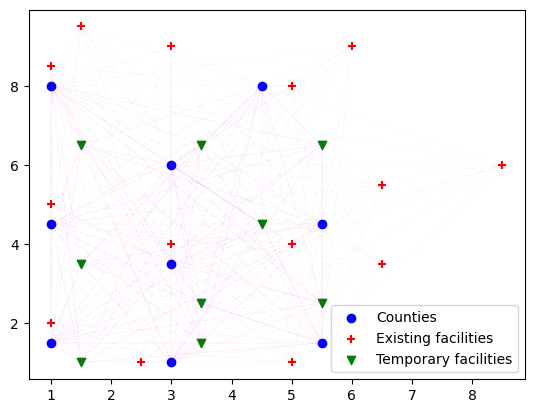

In [153]:

fig, ax = plt.subplots()

ax.scatter(counties["x"], counties["y"], color="blue", label="Counties")
ax.scatter(existing["x"], existing["y"], color="red", label="Existing facilities", marker="+")
ax.scatter(temporary["x"], temporary["y"], color="green", label="Temporary facilities", marker="v")

for i, txt in enumerate(counties.index):
    for j, txt2 in enumerate(existing.index):
        ax.plot([counties["x"][i], existing["x"][j]], [counties["y"][i], existing["y"][j]], color="black", linestyle="--", linewidth=0.2, alpha=0.1)

    for j, txt2 in enumerate(temporary.index):
        ax.plot([counties["x"][i], temporary["x"][j]], [counties["y"][i], temporary["y"][j]], color="magenta", linestyle="--", linewidth=0.2, alpha=0.3)

ax.legend(loc=0)

## Modellierung

Um die Notation zu vereinfachen, führen wir die folgenden Bezeichnungen ein:

* $e \in E$: Der Index und die Menge der bestehenden Einrichtungen zur Behandlung von COVID-19-Patienten,
* $t \in T$: Die Menge der temporären Einrichtungen
* $f \in F = E \cup T$: Der Index und die Menge der Einrichtungen (bestehende und temporäre) zur Behandlung von COVID-19-Patienten
* $c \in C$: Der Index und die Menge der Bezirke

### Parameter

* $\text{Dist}_{c,f}$: Die Entfernung zwischen Bezirk $c$ und Einrichtung $f$ in 10 km
* $\text{Demand}_{c}$: Der prognostizierte Bedarf des Bezirks $c$ (d. h. die prognostizierte Zahl der Patienten)
* $\text{Capacity}_{f}$: Die Kapazität der Einrichtung $f$ (d. h. die Anzahl der Patienten, die gleichzeitig behandelt werden können)
* $\text{Cost}$: Die Kosten für den für den Transport von Patienten pro 10 km
* $\text{FixedCost}$: Die Kosten für den Bau einer temporären Einrichtung
* $\text{AddCapacityCost}$: Die Kosten für die Schaffung zusätzlicher Kapazität in einer temporären Einrichtung

### Zielvariablen

* $y_t \in \{0, 1\}$ Diese Variable ist gleich 1, wenn eine temporäre Einrichtung in Bezirk $t$ errichtet wird, und 0 andernfalls.
* $x_{c,f} \in \mathbb{R}^{+}$ Die Anzahl der Patienten in Bezirk $c$, die von Einrichtung $f$ behandelt werden.
* $z_{t} \in \mathbb{R}^{+}$ Zusätzliche Kapazität, die in Einrichtung $t$ geschaffen wird, wenn eine temporäre Einrichtung in Bezirk $t$ errichtet wird.

### Zielfunktion

Die Gesamtkosten bestehen aus den Transportkosten und den Kosten für den Bau von temporären Einrichtungen.

$$
\min \quad \text{TotalCost} = \text{Cost} \cdot \sum_{c \in C} \sum_{f \in F} \text{Dist}_{c,f} \cdot x_{c,f} \cdot + \sum_{t \in T} y_{t} \cdot \text{FixedCost} + \text{AddCapacityCost} \cdot \sum_{t \in T} z_{t}
$$

### Nebenbedingungen

* Alle Patienten in allen Bezirken müssen behandelt werden:

$$
\sum_{f \in F} x_{c,f} = \text{Demand}_{c} \quad \forall c \in C
$$

* Die bestehenden Einrichtungen dürfen ihre Kapazität nicht überschreiten:

$$
\sum_{c \in C} x_{c,e} \leq \text{Capacity}_{e} \quad \forall e \in E
$$

* Die temporären Einrichtungen dürfen ihre Kapazität nicht überschreiten:

$$
\sum_{c \in C} x_{c,t} \leq \text{Capacity}_{t} \cdot y_{t} + z_{t} \quad \forall t \in T
$$

* Die zusätzliche Kapazität in einer temporären Einrichtung darf 20 Prozent der üblichen Kapazität nicht überschreiten:

$$
z_{t} \leq 0.2 \cdot \text{Capacity}_{t} \cdot y_{t} \quad \forall t \in T
$$



## Umsetzung

Um das Modell umzusetzen, müssen wird zuerst alle Parameter berechnen. In dieser Aufgabe fehlen uns nur die Distanzen zwischen den Bezirken und den Einrichtungen, die wir aus den Koordinaten berechnen müssen. Da wir keine Angaben über die Strassenentfernungen haben, verwenden wir die euklidische Distanz.

In [154]:
# Zuerst fügen wir die Datensätze der bestehenden und temporären Einrichtungen zusammen

facilities = pd.concat([existing, temporary])
facilities

,capacity,x,y
F1,281,1.0,2.0
F2,187,2.5,1.0
F3,200,5.0,1.0
F4,223,6.5,3.5
F5,281,1.0,5.0
F6,281,3.0,4.0
F7,222,5.0,4.0
F8,200,6.5,5.5
F9,250,1.0,8.5
F10,125,1.5,9.5


In [155]:
# Danach verbinden wir den Datensatz der Landkreise mit dem der Einrichtungen

cf = pd.merge(
    counties[["x", "y"]],
    facilities[["x", "y"]], 
    how="cross", 
    suffixes=("_c", "_f")
)
cf.set_index(pd.MultiIndex.from_product([counties.index, facilities.index], names=["county", "facility"]), inplace=True)
cf

x_c  y_c  x_f  y_f
county facility                    
A      F1        1.0  1.5  1.0  2.0
       F2        1.0  1.5  2.5  1.0
       F3        1.0  1.5  5.0  1.0
       F4        1.0  1.5  6.5  3.5
       F5        1.0  1.5  1.0  5.0
...              ...  ...  ...  ...
I      T5        4.5  8.0  3.5  2.5
       T6        4.5  8.0  4.5  4.5
       T7        4.5  8.0  1.5  6.5
       T8        4.5  8.0  3.5  6.5
       T9        4.5  8.0  5.5  6.5

[207 rows x 4 columns]

Die euklidische Distanz zwischen zwei Punkten $A(x_1, y_1)$ und $B(x_2, y_2)$ ist definiert als:

$$
\text{Dist}(A, B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

(-0.2, 1.5)

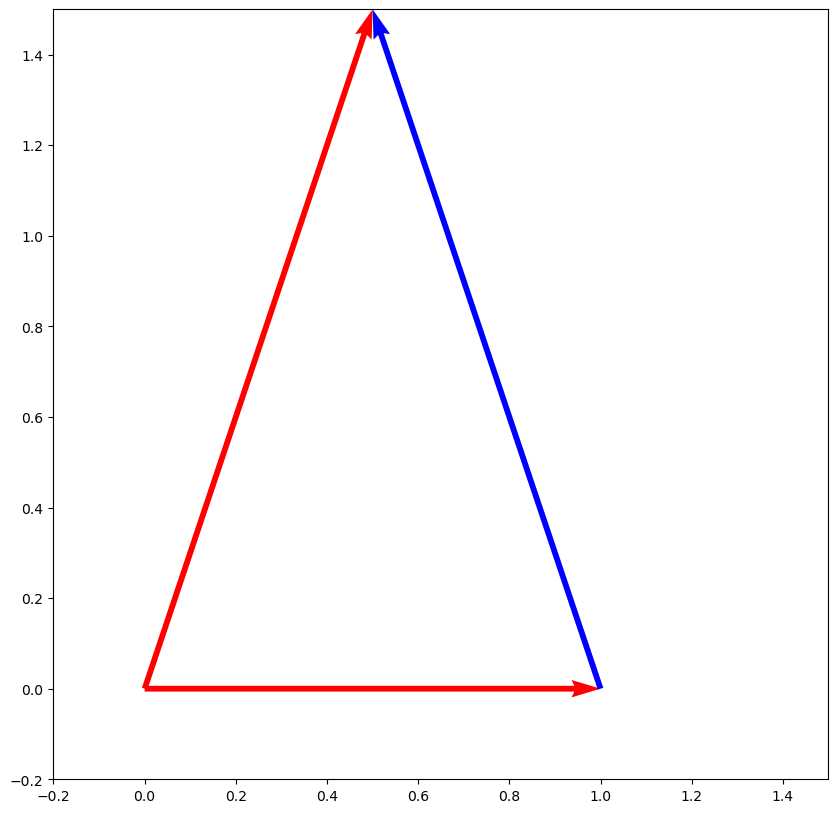

In [156]:
fig, ax = plt.subplots(figsize=(10, 10))

a = np.array([0.5, 1.5])
b = np.array([1, 0])
a_min_b = a - b

ax.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(b[0], b[1], a_min_b[0], a_min_b[1], angles='xy', scale_units='xy', scale=1, color='b')

ax.set_xlim(-0.2, 1.5)
ax.set_ylim(-0.2, 1.5)


In [157]:
cf["dist"] = np.sqrt((cf["x_f"] - cf["x_c"])**2 + (cf["y_f"] - cf["y_c"])**2)
cf

x_c  y_c  x_f  y_f      dist
county facility                              
A      F1        1.0  1.5  1.0  2.0  0.500000
       F2        1.0  1.5  2.5  1.0  1.581139
       F3        1.0  1.5  5.0  1.0  4.031129
       F4        1.0  1.5  6.5  3.5  5.852350
       F5        1.0  1.5  1.0  5.0  3.500000
...              ...  ...  ...  ...       ...
I      T5        4.5  8.0  3.5  2.5  5.590170
       T6        4.5  8.0  4.5  4.5  3.500000
       T7        4.5  8.0  1.5  6.5  3.354102
       T8        4.5  8.0  3.5  6.5  1.802776
       T9        4.5  8.0  5.5  6.5  1.802776

[207 rows x 5 columns]

In [158]:
import gurobipy as gp
from gurobipy import GRB

m = gp.Model("COVID-19 facilities")

# Parameters

trCost = 5
fixedCost = 500e3
addCapacityCost = 50
maxAddCapacityPct = 0.2

# Add variables
x = m.addVars(cf.index, vtype=GRB.CONTINUOUS, name="x")
y = m.addVars(temporary.index, vtype=GRB.BINARY, name="y")
z = m.addVars(temporary.index, vtype=GRB.CONTINUOUS, name="z")

# Add constraints

demandConstrs = m.addConstrs(
    (gp.quicksum(x[c,f] for f in facilities.index) == counties.loc[c, "demand"] for c in counties.index),
    name='Demand of counties'
)

capacityConstrs_existing = m.addConstrs(
    (gp.quicksum(x[c,f] for c in counties.index) <= existing.loc[f, "capacity"] for f in existing.index),
    name='Capacity of existing facilities'
)

capacityConstrs_temporary = m.addConstrs(
    (gp.quicksum(x[c,f] for c in counties.index) <= temporary.loc[f, "capacity"] * y[f] + z[f] for f in temporary.index),
    name='Capacity of temporary facilities'
)

# Max additional temporary capacity

maxAddCapacityConstrs = m.addConstrs(
    (z[f] <= maxAddCapacityPct * temporary.loc[f, "capacity"] * y[f] for f in temporary.index),
    name='Max additional temporary capacity'
)

# Add objective

m.setObjective(
    fixedCost * gp.quicksum(y) + addCapacityCost * gp.quicksum(z) + trCost * gp.quicksum(cf.loc[i, "dist"] * x[i] for i in cf.index),
    GRB.MINIMIZE
)

m.optimize()

if m.status == GRB.OPTIMAL:
    print("Optimal value:", m.objVal)
else:
    print("No solution")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i5-10400F CPU @ 2.90GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 225 columns and 450 nonzeros
Model fingerprint: 0x57f0a7b0
Variable types: 216 continuous, 9 integer (9 binary)
Coefficient statistics:


  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+00, 5e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 5e+02]
Presolve time: 0.00s
Presolved: 41 rows, 225 columns, 450 nonzeros
Variable types: 216 continuous, 9 integer (9 binary)
Found heuristic solution: objective 4516967.0542

Root relaxation: objective 1.103493e+06, 73 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1103492.52    0    4 4516967.05 1103492.52  75.6%     -    0s
H    0     0                    2024325.8583 1103492.52  45.5%     -    0s
H    0     0                    1524551.9479 1103492.52  27.6%     -    0s
     0     0 1103979.19    0    2 1524551.95 1103979.19  27.6%     -    0s
H    0     0                    1522173.0765 1103979.19  27.5%     -    0s
     0     0 1103994.40    0    1 1522173.08 1103994.40  27.5%     -    0s
     

/tmp/ipykernel_88609/3804731448.py:45: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  fixedCost * gp.quicksum(y) + addCapacityCost * gp.quicksum(z) + trCost * gp.quicksum(cf.loc[i, "dist"] * x[i] for i in cf.index),


## Analyse der Lösung

Nachdem wir das Modell gelöst haben, können wir die folgenden Fragen beantworten:

1. Wie viele temporäre Einrichtungen sollten errichtet werden?
2. Welche temporäre Einrichtungen sollten errichtet werden?
3. Wie viele zusätzliche Kapazitäten sollten in jeder temporären Einrichtung geschaffen werden?
4. Gib es bestehende Einrichtungen mit ungenutzter Kapazität?

In [159]:
# Temporary facilities

for f in temporary.index:
    if y[f].x > 0.5:
        print(f"Temporary facility {f} with capacity {z[f].x} is opened")


Temporary facility T1 with capacity 0.0 is opened
Temporary facility T3 with capacity 0.0 is opened
Temporary facility T4 with capacity 0.0 is opened


In [160]:
# Existing facilities

for f in existing.index:
    if capacityConstrs_existing[f].Slack > 1e-6:
        print(f"Existing facility {f} has free capacity of {capacityConstrs_existing[f].Slack}")
    else:
        print(f"Existing facility {f} is at full capacity")

Existing facility F1 is at full capacity
Existing facility F2 is at full capacity
Existing facility F3 is at full capacity
Existing facility F4 is at full capacity
Existing facility F5 is at full capacity
Existing facility F6 is at full capacity
Existing facility F7 is at full capacity
Existing facility F8 is at full capacity
Existing facility F9 is at full capacity
Existing facility F10 is at full capacity
Existing facility F11 has free capacity of 26.0
Existing facility F12 is at full capacity
Existing facility F13 is at full capacity
Existing facility F14 has free capacity of 15.0


Nun können wir verschiedene Szenarien vergleichen, um zu sehen, wie Änderungen der Parameter auf die Lösung wirken.

* Szenario 1: Die Kosten für den Transport von Patienten steigen um 50 Prozent.

* Szenario 2: Die Kosten für den Bau einer temporären Einrichtung steigen um 50 Prozent.

* Szenario 3: Die Kosten für die Schaffung zusätzlicher Kapazität in einer temporären Einrichtung steigen um 50 Prozent.

* Szenario 4: Die erwartete Anzahl der Patienten in jedem Bezirk steigt um 10 Prozent.

Bevor wir mit der Szenarioanalyse beginnen, werden wir das Modell in einer Funktion abstrahieren, um es leichter mit verschiedenen Parametern laufen zu lassen.

In [166]:
def build_covid_19_models(
    counties,
    existing,
    temporary,
    trCost,
    fixedCost,
    addCapacityCost,
    maxAddCapacityPct
    ):

    facilities = pd.concat([existing, temporary])
    cf = pd.merge(
        counties[["x", "y"]],
        facilities[["x", "y"]], 
        how="cross", 
        suffixes=("_c", "_f")
    )

    cf.set_index(pd.MultiIndex.from_product([counties.index, facilities.index], names=["county", "facility"]), inplace=True)
    cf["dist"] = np.sqrt((cf["x_f"] - cf["x_c"])**2 + (cf["y_f"] - cf["y_c"])**2)

    m = gp.Model("COVID-19 facilities")    

    # Add variables
    x = m.addVars(cf.index, vtype=GRB.CONTINUOUS, name="x")
    y = m.addVars(temporary.index, vtype=GRB.BINARY, name="y")
    z = m.addVars(temporary.index, vtype=GRB.CONTINUOUS, name="z")

    # Add constraints    
    demandConstrs = m.addConstrs(
        (gp.quicksum(x[c,f] for f in facilities.index) == counties.loc[c, "demand"] for c in counties.index),
        name="Demand of counties"
    )

    capacityConstrs_existing = m.addConstrs(
        (gp.quicksum(x[c,f] for c in counties.index) <= existing.loc[f, "capacity"] for f in existing.index),
        name="Capacity of existing facilities"
    )

    capacityConstrs_temporary = m.addConstrs(
        (gp.quicksum(x[c,f] for c in counties.index) <= temporary.loc[f, "capacity"] * y[f] + z[f] for f in temporary.index),
        name="Capacity of temporary facilities"
    )

    # Max additional temporary capacity
    maxAddCapacityConstrs = m.addConstrs(
        (z[f] <= maxAddCapacityPct * temporary.loc[f, "capacity"] * y[f] for f in temporary.index),
        name="Max additional temporary capacity"
    )

    # Add objective
    m.setObjective(
        fixedCost * gp.quicksum(y) + addCapacityCost * gp.quicksum(z) + trCost * gp.quicksum(cf.loc[i, "dist"] * x[i] for i in cf.index),
        GRB.MINIMIZE
    )
    
    return m

In [169]:
def summarize_covid_19_solution(mod):
    mod.optimize()

    if m.status == GRB.OPTIMAL:
        print("Optimal value:", m.objVal)
    else:
        print("No solution")


In [170]:
base_scenario_model = build_covid_19_models(
    counties,
    existing,
    temporary,
    trCost=5,
    fixedCost=500e6,
    addCapacityCost=50,
    maxAddCapacityPct=0.2
)

summarize_covid_19_solution(base_scenario_model)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i5-10400F CPU @ 2.90GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 225 columns and 450 nonzeros
Model fingerprint: 0xb21b9940
Variable types: 216 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+00, 5e+08]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 5e+02]
Presolve time: 0.00s
Presolved: 41 rows, 225 columns, 450 nonzeros
Variable types: 216 continuous, 9 integer (9 binary)
Found heuristic solution: objective 4.500017e+09

Root relaxation: objective 1.079191e+09, 73 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1.0792e+09    0    4 4.5000

/tmp/ipykernel_88609/1861210643.py:53: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  fixedCost * gp.quicksum(y) + addCapacityCost * gp.quicksum(z) + trCost * gp.quicksum(cf.loc[i, "dist"] * x[i] for i in cf.index),
